In [2]:
import os
import numpy as np
from tomography_radon import get_rmse, plot_fbp_reconstruction, get_system, get_ssim
from skimage.filters import threshold_mean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Binary Reconstructions

In [3]:
search_path = 'Results/UnderdeterminedResults/binary'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg") and not _.endswith(".pdf")]
rms = np.zeros((4, 3, 4))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['2_Views', '4_Views', '32_Views']
    views = [2, 4, 32]
    for s, j, v in zip(sizes, range(len(sizes)), views):
        res = [x for x in os.listdir(search_path + '/' + f + '/' + s + '/32') if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + '/' + f + '/' + s + '/32/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image, no_angles=v)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            rmse_qa = get_rmse(recon_qa, image)
            rmse_fbp = get_rmse(recon_fbp, image)
            rmse_sart = get_rmse(recon_sart, image)
            rmse_pi = get_rmse(recon_pi, image)
            rms[i, j, 0] = rmse_fbp
            rms[i, j, 1] = rmse_sart
            rms[i, j, 2] = rmse_pi
            rms[i, j, 3] = rmse_qa

['foam', 'molecule', 'snowflake', 'tree']


In [7]:
# SSIM
search_path = 'Results/UnderdeterminedResults/binary'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg") and not _.endswith(".pdf")]
ssim = np.zeros((4, 3, 4))
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['2_Views', '4_Views', '32_Views']
    views = [2, 4, 32]
    for s, j, v in zip(sizes, range(len(sizes)), views):
        res = [x for x in os.listdir(search_path + '/' + f + '/' + s + '/32') if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + '/' + f + '/' + s + '/32/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            system = get_system(image, no_angles=v)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            ssim_qa = get_ssim(recon_qa, image)[0]
            ssim_fbp = get_ssim(recon_fbp, image)[0]
            ssim_sart = get_ssim(recon_sart, image)[0]
            ssim_pi = get_ssim(recon_pi, image)[0]
            ssim[i, j, 0] = ssim_fbp
            ssim[i, j, 1] = ssim_sart
            ssim[i, j, 2] = ssim_pi
            ssim[i, j, 3] = ssim_qa

['foam', 'molecule', 'snowflake', 'tree']


In [ ]:
import copy
search_path = 'Results/UnderdeterminedResults/binary'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
print(images)
for f, i in zip(images, range(len(images))):
    sizes = ['2_Views', '4_Views', '32_Views']
    w = 20
    h = 20
    columns = 6
    print(columns)
    rows = len(sizes)
    views = [2, 4, 32]
    fig, ax = plt.subplots(rows, columns, figsize=(16, 16), gridspec_kw={'hspace': -0.6, 'wspace': 0.15})
    for s, j, v in zip(sizes, range(len(sizes)), views):
        res = [x for x in os.listdir(search_path + '/' + f + '/' + s + '/32') if x.endswith('.npz')]
        if res: 
            res_npz = np.load(search_path + '/' + f + '/' + s + '/32/' + res[0])
            image = res_npz['image']
            recon_fbp = res_npz['reconstruction_fbp']
            recon_sart = res_npz['reconstruction_sart']
            recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
            thresh_fbp = threshold_mean(recon_fbp)
            recon_fbp = recon_fbp > thresh_fbp
            thresh_sart = threshold_mean(recon_sart)
            recon_sart = recon_sart > thresh_sart
            system = get_system(image, no_angles=v)
            sinogram = res_npz['sinogram']
            recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
            thresh_sart = threshold_mean(recon_pi)
            recon_pi = recon_pi > thresh_sart
            # fig.add_subplot(rows, columns, j*columns + 1 )
            ax[j, 0].imshow(image, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 0].set_xticks([])
            ax[j, 0].set_yticks([])  
            plt_sinogram = sinogram.reshape(image.shape[0], v)
            embed = np.zeros(image.shape)
            embed[:, :v] = plt_sinogram
            ax[j, 1].imshow(embed, cmap='gray')
            # ax[j, 0].axis("off")
            ax[j, 1].set_xticks([])
            ax[j, 1].set_yticks([])  
            # fig.add_subplot(rows, columns, j*columns + 2)
            ax[j, 2].imshow(recon_fbp, cmap='gray')
            #ax[j, 1].axis("off")
            ax[j, 2].set_xticks([])
            ax[j, 2].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 3)
            ax[j, 3].imshow(recon_sart, cmap='gray')
            # ax[j, 2].axis("off")
            ax[j, 3].set_xticks([])
            ax[j, 3].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 4)
            ax[j, 4].imshow(recon_pi, cmap='gray')
            #ax[j, 3].axis("off")
            ax[j, 4].set_xticks([])
            ax[j, 4].set_yticks([])
            # fig.add_subplot(rows, columns, j*columns + 5)
            ax[j, 5].imshow(recon_qa, cmap='gray')
            #ax[j, 4].axis("off")
            ax[j, 5].set_xticks([]) 
            ax[j, 5].set_yticks([])
    print("Helloe")
    cols = ["GT", "SG", "FBP", "SART", "PI", "QA"]
    for axe, col in zip(ax[0], cols):
        axe.set_title(col, size=40)

    # rows = ["4 x 4 px", "8 x 8 px", "12 x 12 px", "16 x 16 px", "20 x20 px", "24 x 24 px", "28 x 28 px", "32 x 32 px"]
    rows = views
    for axe, row in zip(ax[:,0], rows):
        axe.set_ylabel(str(row), rotation=0, size=40)
        axe.yaxis.set_label_coords(-.5, 0.3)
    fig.tight_layout()
    plt.savefig(search_path + f + ".png", bbox_inches='tight')
    plt.show()

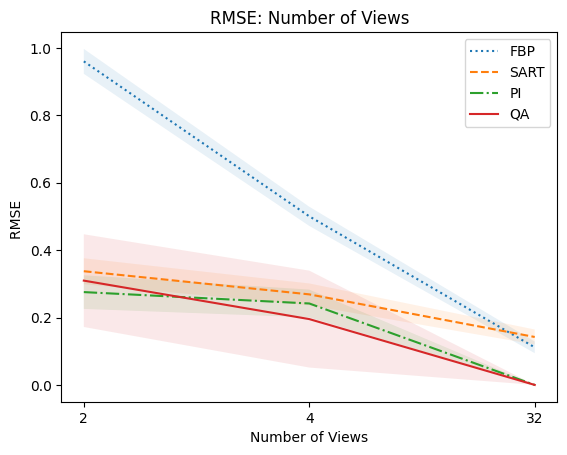

In [4]:
import matplotlib.pyplot as plt
views = [2, 4, 32]
rms_mean = np.sum(rms, axis=0)/4
plt.plot(rms_mean[:, 0], label="FBP", linestyle='dotted')
plt.fill_between(range(3), rms_mean[:, 0]-np.std(rms[:, :, 0], axis=0), rms_mean[:, 0]+np.std(rms[:, :, 0], axis=0), alpha=.1)
plt.plot(rms_mean[:, 1], label="SART", linestyle='dashed')
plt.fill_between(range(3), rms_mean[:, 1]-np.std(rms[:, :, 1], axis=0), rms_mean[:, 1]+np.std(rms[:, :, 1], axis=0), alpha=.1)
plt.plot(rms_mean[:, 2], label="PI", linestyle='dashdot')
plt.fill_between(range(3), rms_mean[:, 2]-np.std(rms[:, :, 2], axis=0), rms_mean[:, 2]+np.std(rms[:, :, 2], axis=0), alpha=.1)
plt.plot(rms_mean[:, 3], label="QA", linestyle='solid')
plt.fill_between(range(3), rms_mean[:, 3]-np.std(rms[:, :, 3], axis=0), rms_mean[:, 3]+np.std(rms[:, :, 3], axis=0), alpha=.1)
plt.xticks(range(len(views)), views)
plt.xlabel("Number of Views")
plt.ylabel("RMSE ")
plt.title("RMSE: Number of Views")
plt.legend()
plt.savefig("Results/UnderdeterminedResults/binary/mean_rmse.svg", format='svg')
plt.savefig("Results/UnderdeterminedResults/binary/mean_rmse.png", format='png')
plt.savefig("Results/UnderdeterminedResults/binary/mean_rmse.pdf", format='pdf')
plt.show()

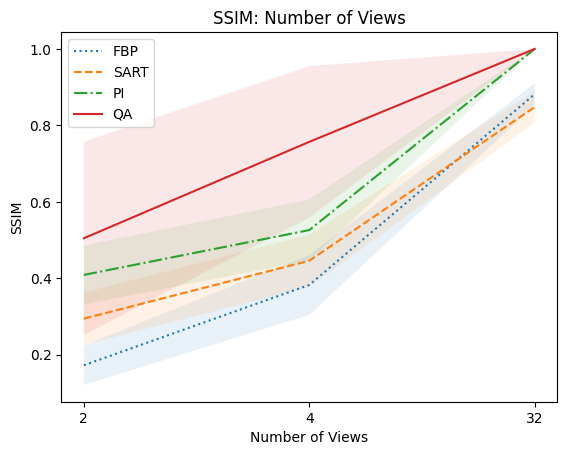

In [8]:
import matplotlib.pyplot as plt
views = [2, 4, 32]
ssim_mean = np.sum(ssim, axis=0)/4
plt.plot(ssim_mean[:, 0], label="FBP", linestyle='dotted')
plt.fill_between(range(3), ssim_mean[:, 0]-np.std(ssim[:, :, 0], axis=0), ssim_mean[:, 0]+np.std(ssim[:, :, 0], axis=0), alpha=.1)
plt.plot(ssim_mean[:, 1], label="SART", linestyle='dashed')
plt.fill_between(range(3), ssim_mean[:, 1]-np.std(ssim[:, :, 1], axis=0), ssim_mean[:, 1]+np.std(ssim[:, :, 1], axis=0), alpha=.1)
plt.plot(ssim_mean[:, 2], label="PI", linestyle='dashdot')
plt.fill_between(range(3), ssim_mean[:, 2]-np.std(ssim[:, :, 2], axis=0), ssim_mean[:, 2]+np.std(ssim[:, :, 2], axis=0), alpha=.1)
plt.plot(ssim_mean[:, 3], label="QA", linestyle='solid')
plt.fill_between(range(3), ssim_mean[:, 3]-np.std(ssim[:, :, 3], axis=0), ssim_mean[:, 3]+np.std(ssim[:, :, 3], axis=0), alpha=.1)
plt.xticks(range(len(views)), views)
plt.xlabel("Number of Views")
plt.ylabel("SSIM")
plt.title("SSIM: Number of Views")
plt.legend()
plt.savefig("Results/UnderdeterminedResults/binary/mean_ssim.svg", format='svg')
plt.savefig("Results/UnderdeterminedResults/binary/mean_ssim.png", format='png')
plt.savefig("Results/UnderdeterminedResults/binary/mean_ssim.pdf", format='pdf')
plt.show()

# Shepp-Logan Reconstructions

In [ ]:
search_path = 'Results/UnderdeterminedResults/shepp-logan'
images = [_ for _ in os.listdir(search_path) if not _.endswith(".npy") and not _.endswith(".png") and not _.endswith(".svg")]
rms = np.zeros((1, 3, 4))
print(images)
sizes = ['2_Views', '4_Views', '32_Views']
views = [2, 4, 32]
for s, j, v in zip(sizes, range(len(sizes)), views):
    res = [x for x in os.listdir(search_path + '/' + s + '/32') if x.endswith('.npz')]
    if res: 
        res_npz = np.load(search_path + '/' + s + '/32/' + res[0])
        image = res_npz['image']
        recon_fbp = res_npz['reconstruction_fbp']
        recon_sart = res_npz['reconstruction_sart']
        recon_qa = res_npz['reconstruction_qa'][0].reshape(image.shape)
        system = get_system(image, no_angles=v)
        sinogram = res_npz['sinogram']
        recon_pi = np.linalg.pinv(system).dot(sinogram.flatten()).reshape(image.shape)
        rmse_qa = get_rmse(recon_qa, image)
        rmse_fbp = get_rmse(recon_fbp, image)
        rmse_sart = get_rmse(recon_sart, image)
        rmse_pi = get_rmse(recon_pi, image)
        rms[0, j, 0] = rmse_fbp
        rms[0, j, 1] = rmse_sart
        rms[0, j, 2] = rmse_pi
        rms[0, j, 3] = rmse_qa